In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [2]:
# url of the web page 
url="https://www.iplt20.com/stats/2016/most-runs"

In [3]:
# check the page has been hit
page=requests.get(url)
page.status_code

200

In [4]:
# extract the poage content
pagecontent=page.text

In [5]:
pagecontent=page.text
soup=BeautifulSoup(pagecontent)


In [6]:
pagecontent

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="IPLT20.com - Indian Premier League Official Website"/>\n<meta name="keywords" content="ipl, iplt20, indian premier league, ipl cricket, ipl match, ipl live, ipl score, ipl scorecard, ipl stats, ipl schedule, ipl results, ipl points table, ipl teams, ipl videos, ipl teams, ipl news, BCCI IPL"/>\n<meta property="og:type" content="website"/>\n<meta name="description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n<meta name="twitter:description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n<meta property="og:title" content="IPLT20.com - Indian Premier League Official Website"/>\n<title>IPLT20.com - Indian Premier League Official Website</title>\n<meta property="og:description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n\n\n    <meta charset="UTF-8">\n    <meta na

## Web Scrapping

In [7]:
player=[]
matches=[]
notout=[]
innings=[]
runs=[]
average=[]
ballsfaced=[]
strikerate=[]
no_4s=[]
no_6s=[]
Year=[]
hs=[]
for x in range(2015,2020):
    URL ='https://www.iplt20.com/stats/{}/most-runs'.format(x)
    page=requests.get(URL)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)

    pname= soup.find_all('div',attrs={'class':"top-players__player-name"})
    for i in pname:
        if i is None:
            player.append(np.NaN)
        else:
            player.append(i.text)


  
    mat=soup.find_all('td',attrs={'class':"top-players__m top-players__padded"})
    for i in mat:
        if i is None:
            matches.append(np.NaN)
        else:
            matches.append(i.text)
    


    no=soup.find_all('td',attrs={'class':'top-players__no'})
    for i in no:
        if i is None:
            notout.apend(np.NaN)
        else:
            notout.append(i.text)
    


   
    ing =soup.find_all('td',attrs={'class':'top-players__inns'})
    for i in ing:
        if i is None:
            innings.append(np.NaN)
        else:
            innings.append(i.text)
  

    
    run=soup.find_all('td',attrs={'class':'top-players__r is-active'})
    for i in run:
        if i is None:
            runs.append(np.NaN)
        else:
            runs.append(i.text)
       
    highscore = soup.find_all('td', attrs={'class' :'top-players__hs'})
    for i in highscore:
        if i is None:
            hs.append(np.NaN)
        else:
            hs.append(i.text)
    
    avg=soup.find_all('td',attrs={'class':'top-players__a'})
    for i in avg:
        if i is None :
            average.append(np.NaN)
        else:
            average.append(i.text)
  
    bf=soup.find_all('td',attrs={'class':'top-players__b'})
    for i in bf:
        if i is None:
            ballsfaced.append(np.NaN)
        else:
            ballsfaced.append(i.text)
   
   
    sr=soup.find_all('td',attrs={'class':'top-players__sr'})
    for i in sr:
        if i is None:
            strikerate.append(np.NaN)
        else:
            strikerate.append(i.text)
  
  
    NO_4s=soup.find_all('td',attrs={'class':'top-players__4s'})
    for i in NO_4s:
        if i is None:
            no_4s.append(np.NaN)
        else:
            no_4s.append(i.text)


    NO_6s=soup.find_all('td',attrs={'class':'top-players__6s'})
    for i in NO_6s:
        if i is None:
            no_6s.append(np.NaN)
        else:
            no_6s.append(i.text)
    
    for i in range(0,100):
        Year.append(x)
 



In [8]:
print(len(player))
print(len(matches))
print(len(notout))
print(len(innings))
print(len(runs))
print(len(average))
print(len(strikerate))
print(len(no_4s))
print(len(no_6s))
print(len(Year))
print(len(ballsfaced))
print(len(hs))

500
500
500
500
500
500
500
500
500
500
500
500


In [9]:
IPL_df=pd.DataFrame({"Players":player,"Matches":matches,"NO":notout,"Ings":innings,"Runs":runs,"HighScore":hs,"Avg":average,"BF":ballsfaced,"SR":strikerate,"N_4":no_4s,"N_6":no_6s,"Year":Year})
IPL_df

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,\n\n David\n ...,\n 14\n,\n 1\n,\n 14\n,\n 562\n,\n 91\n,\n 43.23\n,\n 359\n,\n 156.54\n,\n 65\n,\n 21\n,2015
1,\n\n Lendl\n ...,\n 13\n,\n 1\n,\n 13\n,\n 540\n,\n 71\n,\n 45.00\n,\n 441\n,\n 122.44\n,\n 56\n,\n 21\n,2015
2,\n\n Ajinkya\n ...,\n 14\n,\n 2\n,\n 13\n,\n 540\n,\n 91*\n,\n 49.09\n,\n 413\n,\n 130.75\n,\n 53\n,\n 13\n,2015
3,\n\n AB\n ...,\n 16\n,\n 3\n,\n 14\n,\n 513\n,\n 133*\n,\n 46.63\n,\n 293\n,\n 175.08\n,\n 60\n,\n 22\n,2015
4,\n\n Virat\n ...,\n 16\n,\n 5\n,\n 16\n,\n 505\n,\n 82*\n,\n 45.90\n,\n 386\n,\n 130.82\n,\n 35\n,\n 23\n,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
495,\n\n Carlos\n ...,\n 2\n,\n 0\n,\n 2\n,\n 11\n,\n 6\n,\n 5.50\n,\n 10\n,\n 110.00\n,\n 1\n,\n 0\n,2019
496,\n\n Ishant\n ...,\n 13\n,\n 3\n,\n 3\n,\n 10\n,\n 10*\n,\n -\n,\n 3\n,\n 333.33\n,\n 1\n,\n 1\n,2019
497,\n\n Shakib\n ...,\n 3\n,\n 0\n,\n 1\n,\n 9\n,\n 9\n,\n 9.00\n,\n 10\n,\n 90.00\n,\n 0\n,\n 0\n,2019
498,\n\n Pawan\n ...,\n 7\n,\n 0\n,\n 4\n,\n 9\n,\n 5\n,\n 2.25\n,\n 12\n,\n 75.00\n,\n 1\n,\n 0\n,2019


In [10]:
IPL_df.tail()

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
495,\n\n Carlos\n ...,\n 2\n,\n 0\n,\n 2\n,\n 11\n,\n 6\n,\n 5.50\n,\n 10\n,\n 110.00\n,\n 1\n,\n 0\n,2019
496,\n\n Ishant\n ...,\n 13\n,\n 3\n,\n 3\n,\n 10\n,\n 10*\n,\n -\n,\n 3\n,\n 333.33\n,\n 1\n,\n 1\n,2019
497,\n\n Shakib\n ...,\n 3\n,\n 0\n,\n 1\n,\n 9\n,\n 9\n,\n 9.00\n,\n 10\n,\n 90.00\n,\n 0\n,\n 0\n,2019
498,\n\n Pawan\n ...,\n 7\n,\n 0\n,\n 4\n,\n 9\n,\n 5\n,\n 2.25\n,\n 12\n,\n 75.00\n,\n 1\n,\n 0\n,2019
499,\n\n Tim\n ...,\n 3\n,\n 1\n,\n 1\n,\n 9\n,\n 9*\n,\n -\n,\n 9\n,\n 100.00\n,\n 0\n,\n 0\n,2019


## Data Cleaning


In [11]:
IPL_df.Players=IPL_df.Players.apply(lambda x:x.replace('\n',''))
IPL_df.Matches=IPL_df.Matches.apply(lambda x:x.replace('\n',''))
IPL_df.NO=IPL_df.NO.apply(lambda x:x.replace('\n',''))
IPL_df.Ings=IPL_df.Ings.apply(lambda x:x.replace('\n',''))
IPL_df.Runs=IPL_df.Runs.apply(lambda x:x.replace('\n',''))
IPL_df.HighScore=IPL_df.HighScore.apply(lambda x:x.replace('\n','').replace('*',''))
IPL_df.Avg=IPL_df.Avg.apply(lambda x:x.replace('\n',''))
IPL_df.BF=IPL_df.BF.apply(lambda x:x.replace('\n',''))
IPL_df.SR=IPL_df.SR.apply(lambda x:x.replace('\n',''))
IPL_df.N_4=IPL_df.N_4.apply(lambda x:x.replace('\n',''))
IPL_df.N_6=IPL_df.N_6.apply(lambda x:x.replace('\n',''))
IPL_df.head()

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,David ...,14,1,14,562,91,43.23,359,156.54,65,21,2015
1,Lendl ...,13,1,13,540,71,45.00,441,122.44,56,21,2015
2,Ajinkya ...,14,2,13,540,91,49.09,413,130.75,53,13,2015
3,AB ...,16,3,14,513,133,46.63,293,175.08,60,22,2015
4,Virat ...,16,5,16,505,82,45.90,386,130.82,35,23,2015


In [12]:
reg=r'[a-zA-z]+'
IPL_df['Players']=IPL_df['Players'].apply(lambda x:re.compile(reg).findall(x))
IPL_df

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,"[David, Warner]",14,1,14,562,91,43.23,359,156.54,65,21,2015
1,"[Lendl, Simmons]",13,1,13,540,71,45.00,441,122.44,56,21,2015
2,"[Ajinkya, Rahane]",14,2,13,540,91,49.09,413,130.75,53,13,2015
3,"[AB, de, Villiers]",16,3,14,513,133,46.63,293,175.08,60,22,2015
4,"[Virat, Kohli]",16,5,16,505,82,45.90,386,130.82,35,23,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[Carlos, Brathwaite]",2,0,2,11,6,5.50,10,110.00,1,0,2019
496,"[Ishant, Sharma]",13,3,3,10,10,-,3,333.33,1,1,2019
497,"[Shakib, Al, Hasan]",3,0,1,9,9,9.00,10,90.00,0,0,2019
498,"[Pawan, Negi]",7,0,4,9,5,2.25,12,75.00,1,0,2019


In [13]:
IPL_df['Players']=IPL_df['Players'].apply(lambda x:''.join(x))
IPL_df.head()

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.23,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.00,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.09,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015


In [14]:
IPL_df.tail()

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
495,CarlosBrathwaite,2,0,2,11,6,5.50,10,110.00,1,0,2019
496,IshantSharma,13,3,3,10,10,-,3,333.33,1,1,2019
497,ShakibAlHasan,3,0,1,9,9,9.00,10,90.00,0,0,2019
498,PawanNegi,7,0,4,9,5,2.25,12,75.00,1,0,2019
499,TimSouthee,3,1,1,9,9,-,9,100.00,0,0,2019


In [15]:
IPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Players    500 non-null    object
 1   Matches    500 non-null    object
 2   NO         500 non-null    object
 3   Ings       500 non-null    object
 4   Runs       500 non-null    object
 5   HighScore  500 non-null    object
 6   Avg        500 non-null    object
 7   BF         500 non-null    object
 8   SR         500 non-null    object
 9   N_4        500 non-null    object
 10  N_6        500 non-null    object
 11  Year       500 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 47.0+ KB


In [16]:
# converting datatype

In [17]:
IPL_df["Runs"]=IPL_df["Runs"].astype(int)
IPL_df["Matches"]=IPL_df["Matches"].astype(int)
IPL_df["NO"]=IPL_df["NO"].astype(int)
IPL_df["Ings"]=IPL_df["Ings"].astype(int)
IPL_df["BF"]=IPL_df["BF"].astype(int)
IPL_df["HighScore"]=IPL_df["HighScore"].astype(int,errors='raise')
IPL_df['Avg'] = pd.to_numeric(IPL_df['Avg'],errors = 'coerce')
IPL_df["SR"]=IPL_df["SR"].astype(float)
IPL_df["N_4"]=IPL_df["N_4"].astype(int)
IPL_df["N_6"]=IPL_df["N_6"].astype(int)

In [18]:
IPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Players    500 non-null    object 
 1   Matches    500 non-null    int32  
 2   NO         500 non-null    int32  
 3   Ings       500 non-null    int32  
 4   Runs       500 non-null    int32  
 5   HighScore  500 non-null    int32  
 6   Avg        486 non-null    float64
 7   BF         500 non-null    int32  
 8   SR         500 non-null    float64
 9   N_4        500 non-null    int32  
 10  N_6        500 non-null    int32  
 11  Year       500 non-null    int64  
dtypes: float64(2), int32(8), int64(1), object(1)
memory usage: 31.4+ KB


In [19]:
IPL_df['Avg'].isnull().sum() # 14 null values in avg

14

In [20]:
# nullvalues are filled using the following formula 
IPL_df["Avg"].fillna(IPL_df["Runs"]/IPL_df["BF"],inplace=True)
IPL_df.head()


,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.23,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.00,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.09,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015


In [21]:
IPL_df.isnull().sum()

Players      0
Matches      0
NO           0
Ings         0
Runs         0
HighScore    0
Avg          0
BF           0
SR           0
N_4          0
N_6          0
Year         0
dtype: int64

In [22]:
#convering to csv
IPL_df.to_csv("iplstats.csv",index=False)
IPL_df.head()

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.23,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.00,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.09,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015


In [23]:
#Reading from csv file
pd.read_csv("iplstats.csv")

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.230000,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.000000,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.090000,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.630000,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.900000,386,130.82,35,23,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
495,CarlosBrathwaite,2,0,2,11,6,5.500000,10,110.00,1,0,2019
496,IshantSharma,13,3,3,10,10,3.333333,3,333.33,1,1,2019
497,ShakibAlHasan,3,0,1,9,9,9.000000,10,90.00,0,0,2019
498,PawanNegi,7,0,4,9,5,2.250000,12,75.00,1,0,2019


## Data Analysis

In [24]:
IPL_df.head() # shows first 5 rows and 12 column

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.23,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.00,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.09,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015


In [25]:
IPL_df.tail() # shows last 5 rows and 12columns

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
495,CarlosBrathwaite,2,0,2,11,6,5.500000,10,110.00,1,0,2019
496,IshantSharma,13,3,3,10,10,3.333333,3,333.33,1,1,2019
497,ShakibAlHasan,3,0,1,9,9,9.000000,10,90.00,0,0,2019
498,PawanNegi,7,0,4,9,5,2.250000,12,75.00,1,0,2019
499,TimSouthee,3,1,1,9,9,1.000000,9,100.00,0,0,2019


In [26]:
IPL_df.info() # shows the no:of columns rows,datatype of each column and the non null values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Players    500 non-null    object 
 1   Matches    500 non-null    int32  
 2   NO         500 non-null    int32  
 3   Ings       500 non-null    int32  
 4   Runs       500 non-null    int32  
 5   HighScore  500 non-null    int32  
 6   Avg        500 non-null    float64
 7   BF         500 non-null    int32  
 8   SR         500 non-null    float64
 9   N_4        500 non-null    int32  
 10  N_6        500 non-null    int32  
 11  Year       500 non-null    int64  
dtypes: float64(2), int32(8), int64(1), object(1)
memory usage: 31.4+ KB


## Statistical Summary

In [27]:
# it shows 5 point summary of data ie mean, median, mode, no of rows,min ,max values for each variable 

In [28]:
IPL_df.describe()

,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000
mean,10.204000,1.790000,8.352000,180.278000,46.894000,24.052439,133.610000,131.355840,16.216000,7.35000,2017.00000
std,4.576929,1.693409,4.555172,167.581382,28.828266,14.216670,118.431677,30.863418,16.761361,8.04269,1.41563
min,1.000000,0.000000,1.000000,9.000000,5.000000,1.000000,3.000000,58.060000,0.000000,0.00000,2015.00000
25%,6.000000,0.000000,4.000000,42.000000,21.000000,13.675000,33.750000,115.425000,3.000000,1.00000,2016.00000
50%,11.000000,1.000000,8.000000,123.000000,44.000000,22.805000,94.000000,130.580000,10.000000,5.00000,2017.00000
75%,14.000000,3.000000,13.000000,284.500000,67.000000,31.605000,210.000000,146.452500,25.000000,10.00000,2018.00000
max,17.000000,9.000000,17.000000,973.000000,133.000000,86.000000,640.000000,333.330000,88.000000,52.00000,2019.00000


## Data Visualization

### Univariate Analysis

## Histogram

Analysing the distribution of  whole data 

In [29]:
IPL_df

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
0,DavidWarner,14,1,14,562,91,43.230000,359,156.54,65,21,2015
1,LendlSimmons,13,1,13,540,71,45.000000,441,122.44,56,21,2015
2,AjinkyaRahane,14,2,13,540,91,49.090000,413,130.75,53,13,2015
3,ABdeVilliers,16,3,14,513,133,46.630000,293,175.08,60,22,2015
4,ViratKohli,16,5,16,505,82,45.900000,386,130.82,35,23,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
495,CarlosBrathwaite,2,0,2,11,6,5.500000,10,110.00,1,0,2019
496,IshantSharma,13,3,3,10,10,3.333333,3,333.33,1,1,2019
497,ShakibAlHasan,3,0,1,9,9,9.000000,10,90.00,0,0,2019
498,PawanNegi,7,0,4,9,5,2.250000,12,75.00,1,0,2019


array([[<AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'Avg'}>],
       [<AxesSubplot:title={'center':'HighScore'}>, <AxesSubplot:>]],
      dtype=object)

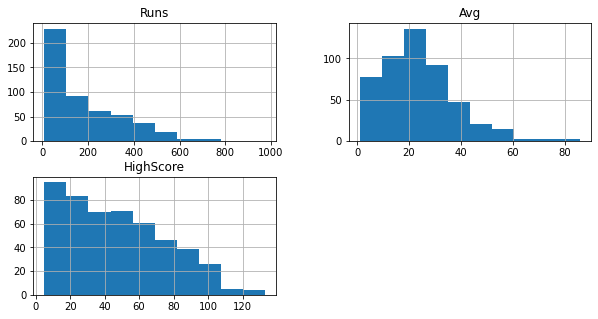

In [30]:
IPL_df.hist(["Runs","Avg","HighScore"], figsize=(10,5))


### Analysis

From the above histogram we can infer the following:

* Runs distribution is highly right skewed and maximum runrate distributed between 0-200
* Average is also right skewed and maximum average rate falls between 20-40
* High score data is right skewed and maximum high score of the players are around 100 




### Line Graph

#### Comparing Virat Kohli's runs in IPLT20(2015-2019)

In [32]:
# Highscore of each year
Players =IPL_df[IPL_df["Players"]=='ViratKohli']
Players


,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015
100,ViratKohli,16,4,16,973,113,81.08,640,152.03,83,38,2016
222,ViratKohli,10,0,10,308,64,30.80,252,122.22,23,11,2017
306,ViratKohli,14,3,14,530,92,48.18,381,139.10,52,18,2018
407,ViratKohli,14,0,14,464,100,33.14,328,141.46,46,13,2019


Text(0.5, 1.0, "Virat Kohli's Avg Runs/Year")

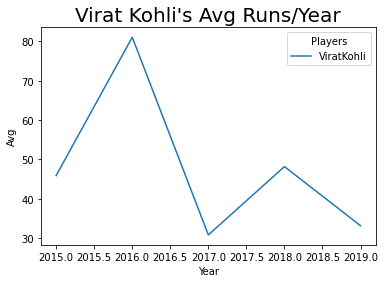

In [33]:
sns.lineplot(x="Year",y="Avg", hue="Players",data=Players)
plt.title("Virat Kohli's Avg Runs/Year",size=20)

### Observations

* The above graph compares the Avg runs scored by player virat kohli for the IPLT20 Seasons(2015-2019)

* it shows the trend of average runs it is highest in 2016 and lowest in 2019


### Distribution Plot 

##### Distribution of Strike rate of the players in IPLt20(2015-2019)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Strike rate of players/ Year')

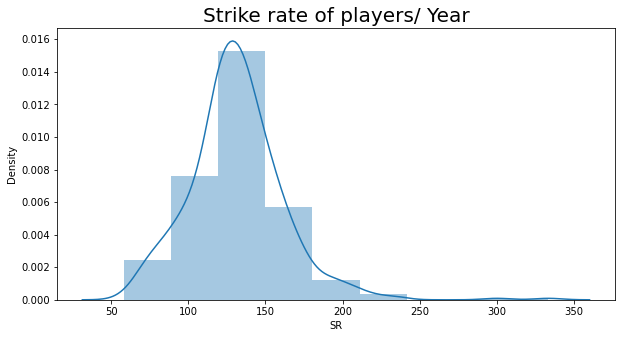

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(IPL_df['SR'],bins=9)
plt.title("Strike rate of players/ Year", size=20)

#### Ditribution plot combines the histogram and kernel density plot 

* It shows the distribution of strike rate of players of IPlT20(2015-2019)
* The High Score  of players are right skewed and most High Score falls between range 10-75 range 

## Bivariate Analysis

### Bargraph

### Maximum runs in IPLT20(2015-2019)

<AxesSubplot:title={'center':'Max Runs/Year'}, xlabel='Year'>

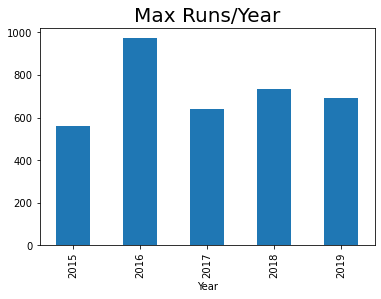

In [31]:
Max_runs=IPL_df.groupby(["Year"])["Runs"].max().plot.bar()
plt.title("Max Runs/Year",size=20)
Max_runs

### Observations 

The above bar graph shows maximum runs scored each year of IPL 
* Year 2016 has max score and 2015 has minimum score 

### BOX Plot

### Comparing top players performance in each season(2015-2019)

In [35]:
v=IPL_df.loc[IPL_df.Players == 'ViratKohli']
a=IPL_df.loc[IPL_df.Players == 'ABdeVilliers']
d= IPL_df.loc[IPL_df.Players=="DavidWarner"]
s=IPL_df.loc[IPL_df.Players=="ShikharDhawan"]
top_Player =pd.concat([v,a,d,s])

In [36]:
top_Player

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015
100,ViratKohli,16,4,16,973,113,81.08,640,152.03,83,38,2016
222,ViratKohli,10,0,10,308,64,30.80,252,122.22,23,11,2017
306,ViratKohli,14,3,14,530,92,48.18,381,139.10,52,18,2018
407,ViratKohli,14,0,14,464,100,33.14,328,141.46,46,13,2019
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
102,ABdeVilliers,16,3,16,687,129,52.84,407,168.79,57,37,2016
241,ABdeVilliers,9,1,9,216,89,27.00,163,132.51,12,16,2017
311,ABdeVilliers,12,2,11,480,90,53.33,275,174.54,39,30,2018
410,ABdeVilliers,13,3,13,442,82,44.20,287,154.00,31,26,2019


### Comparing the runs of top players in IPLT20(2015-2019)

Text(0.5, 1.0, "Comparison of Player's Runs in IPLT20 (2015-2019)")

<Figure size 1800x1200 with 0 Axes>

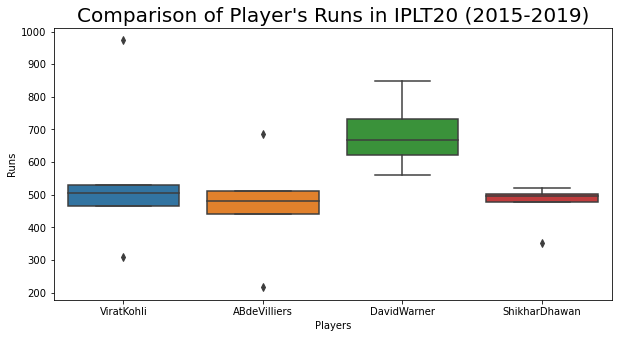

In [37]:
plt.figure(dpi = 300)
plt.figure(figsize=(10,5))
sns.boxplot(x="Players",y="Runs",data=top_Player)
plt.title("Comparison of Player's Runs in IPLT20 (2015-2019)",size=20)


### Observations

Box plot gives the 5 point summary of data 
  * Min runs scored by the players for the seasons(2015-2019)
  * Max runs scored by the players for the season (2015-2019)
  * Q1-25th percentile 
  * Q2-75th percentile
  * Median Value 

* virat Kohli has the max runs for the seasons and the runs for the seasons has not much variations runs are between 300-500
* AB de villiers has max and min rus as outliers and 50% runs lies between 480- 550
* David Warner has min score is higher than others and has right skewed distibution of runs with 50% of runs lies between 550-890 
* sikhar Dhawan 50% scores lies between 480-550 and has the minimum runs as outlier  
 

### Violin Plot

###  Comparing highestscore  of top players IPLT20(2015-2019)

Text(0.5, 1.0, 'Players vs HighScore')

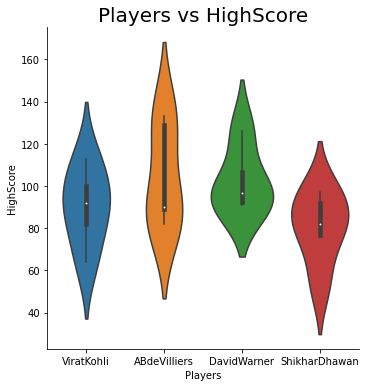

In [38]:
sns.catplot(x="Players",y="HighScore",data=top_Player,kind="violin")
plt.title("Players vs HighScore", size=20)

### Observations

##### Violin plot is the combination of kernel density plot on each side and boxplot 
* The highest score for virat kohli is between 60-120 and has normal distribution 
* The highest score of the player Ab de vlliers is between 80-138 and the distribution covers whole range 
* The highest score of the player David Warner is between 90-138 and the distribution is right skewed he has the highest score   than  others  
*  The highest score of the player shikhar Dhawan  is between 70-125 and the distribution is left skewed  


### Strip plot 

### Comparing players Average and Runs in IPLT20(2015-2019)

Text(0.5, 1.0, 'Players vs Avg')

<Figure size 1800x1200 with 0 Axes>

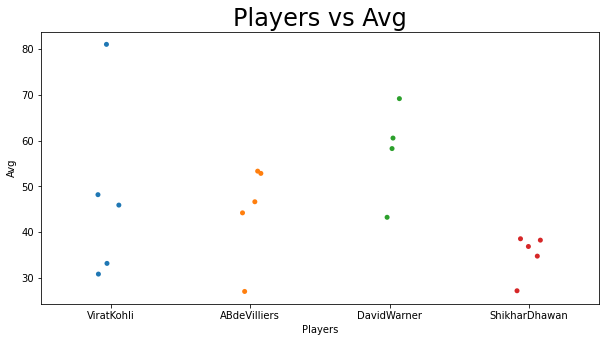

In [39]:
plt.figure(dpi = 300)
plt.figure(figsize=(10,5))
sns.stripplot(x ='Players', y ="Avg" ,data = top_Player, jitter = True, dodge = True)
plt.title("Players vs Avg", size =24)

### Observations

#### Strip plot is alternative to histogram and distribution plots for small datasets 

* The above plot shows the distribution of average scores of players in IPLT20(2015-2019)
 * Virat Kohli has the highest average of all players in seasons (2015- 2015)
 * David Warner range of average run rate is higher than other players 
* From this we can conclude that david warner avg runs is better than other players 

### Swarm plot 

Text(0.5, 1.0, 'Players Vs BF')

<Figure size 1800x1200 with 0 Axes>

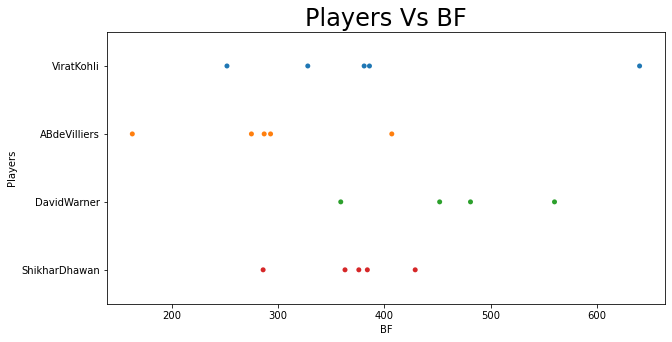

In [40]:
plt.figure(dpi = 300)
plt.figure(figsize=(10,5))
sns.swarmplot(x ='BF', y ='Players', data = top_Player)
plt.title("Players Vs BF",size=24)

### Observations

#### Seaborn swarmplot is probably similar to stripplot, only the points are adjusted so it won't get overlap to each other as it helps to have better representation of the distribution of values. 

* The above plot shows the distribution of balls faced by the players in IPLT20(2015-2019)
  * Virat kohli has the highest number of balls faced
* David Warner's  balls faced range is higher than the other players


### Scatter  Plot

###  Comparing the relationship between players average score and runs of players in IPLT20(2015-2019)

Text(0.5, 1.0, 'Runs vs Avg')

<Figure size 1080x720 with 0 Axes>

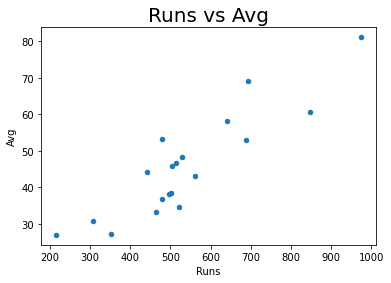

In [41]:
plt.figure(figsize=(15,10))
top_Player.plot(x='Runs',y="Avg",kind='scatter')
plt.title("Runs vs Avg",size=20)

###### scatter plot shows the relation between data 

The above graph shows the positive corelation between runs of players and average score as the runs increase the average increase they are positively corelated

### Regression Plot

###  Comparing Runs and HighScore of each players IPLT20(2015-2019)

Text(0.5, 1.0, 'Runs vs HighScore')

<Figure size 1440x1080 with 0 Axes>

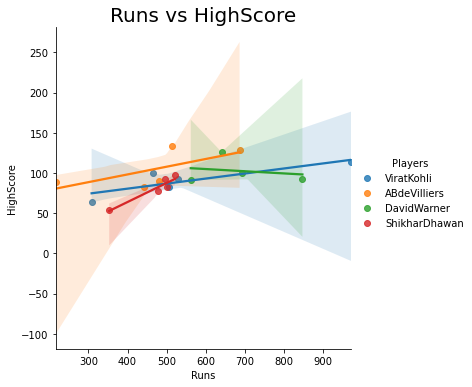

In [42]:
plt.figure(figsize=(20,15))
sns.lmplot(x="Runs",y="HighScore",hue="Players",data=top_Player)
plt.title("Runs vs HighScore", size=20)

### Observations

##### Regression plot shows correlation between variables by calculating regression lines between the points 

There is no corelation between the run rate and strike rate of players 

### Relational Plot

### Comparing Runs and N_4 of players in IPLT20(2015-2019)

Text(0.5, 1.0, 'Runs Vs N_4')

<Figure size 600x400 with 0 Axes>

<Figure size 720x360 with 0 Axes>

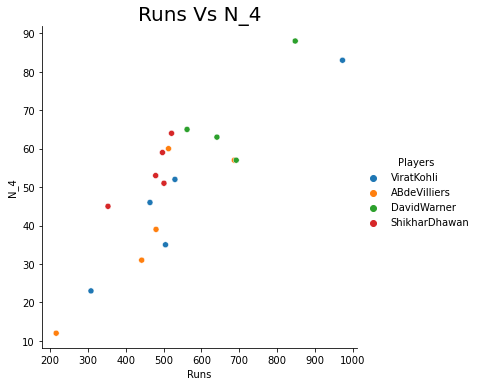

In [43]:
plt.figure(dpi=100)
plt.figure(figsize=(10,5))
sns.relplot(x="Runs",y="N_4",data=top_Player,hue ="Players")
plt.title("Runs Vs N_4", size=20)

### Observations

##### Relational plot shows the statistical relation between points 

* Shows the relation between the players runs and the N_4 sored for the seasons (2015-2019)
* We can see a positive correlationship between runs and N_4 for all players except David warner




### Joint Plot 

### Comparing  Runs and N_6 of players in IPLT20(2015-2019)

<Figure size 720x360 with 0 Axes>

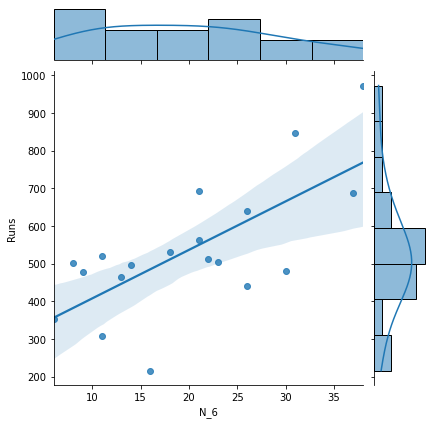

In [44]:
plt.figure(figsize=(10,5))
sns.jointplot(x="N_6",y="Runs",data=top_Player,kind="reg")

##### Joint  plot shows the distribution of variables as well as the relationship betwen them


* The above plot shows the distribution of N_6 and runs  of players from season(2015-2019)
* The maximum Runs of  each player is between 400-600
* The maximum N_6 of the players is between 1-25
* There is corelation between N_6  and Runs 


## Multivariate Analysis 

In [45]:
#Top players scores in all seasons 
v=IPL_df.loc[IPL_df.Players == 'ViratKohli']
a=IPL_df.loc[IPL_df.Players == 'ABdeVilliers']
d= IPL_df.loc[IPL_df.Players=="DavidWarner"]
s=IPL_df.loc[IPL_df.Players=="ShikharDhawan"]
top_Player =pd.concat([v,a,d,s])

In [46]:

top_Player

,Players,Matches,NO,Ings,Runs,HighScore,Avg,BF,SR,N_4,N_6,Year
4,ViratKohli,16,5,16,505,82,45.90,386,130.82,35,23,2015
100,ViratKohli,16,4,16,973,113,81.08,640,152.03,83,38,2016
222,ViratKohli,10,0,10,308,64,30.80,252,122.22,23,11,2017
306,ViratKohli,14,3,14,530,92,48.18,381,139.10,52,18,2018
407,ViratKohli,14,0,14,464,100,33.14,328,141.46,46,13,2019
3,ABdeVilliers,16,3,14,513,133,46.63,293,175.08,60,22,2015
102,ABdeVilliers,16,3,16,687,129,52.84,407,168.79,57,37,2016
241,ABdeVilliers,9,1,9,216,89,27.00,163,132.51,12,16,2017
311,ABdeVilliers,12,2,11,480,90,53.33,275,174.54,39,30,2018
410,ABdeVilliers,13,3,13,442,82,44.20,287,154.00,31,26,2019


In [47]:
tp=top_Player.drop(["Matches","NO","Ings","Year",],axis=1)

In [48]:
tp

,Players,Runs,HighScore,Avg,BF,SR,N_4,N_6
4,ViratKohli,505,82,45.90,386,130.82,35,23
100,ViratKohli,973,113,81.08,640,152.03,83,38
222,ViratKohli,308,64,30.80,252,122.22,23,11
306,ViratKohli,530,92,48.18,381,139.10,52,18
407,ViratKohli,464,100,33.14,328,141.46,46,13
3,ABdeVilliers,513,133,46.63,293,175.08,60,22
102,ABdeVilliers,687,129,52.84,407,168.79,57,37
241,ABdeVilliers,216,89,27.00,163,132.51,12,16
311,ABdeVilliers,480,90,53.33,275,174.54,39,30
410,ABdeVilliers,442,82,44.20,287,154.00,31,26


In [49]:

tp.corr()

,Runs,HighScore,Avg,BF,SR,N_4,N_6
Runs,1.000000,0.541687,0.894918,0.943942,0.398541,0.868696,0.698991
HighScore,0.541687,1.000000,0.551784,0.360068,0.662658,0.469740,0.619948
Avg,0.894918,0.551784,1.000000,0.798953,0.495652,0.629253,0.797533
BF,0.943942,0.360068,0.798953,1.000000,0.082996,0.843885,0.476516
SR,0.398541,0.662658,0.495652,0.082996,1.000000,0.304958,0.753935
N_4,0.868696,0.469740,0.629253,0.843885,0.304958,1.000000,0.386670
N_6,0.698991,0.619948,0.797533,0.476516,0.753935,0.386670,1.000000


### Heat Map

<AxesSubplot:>

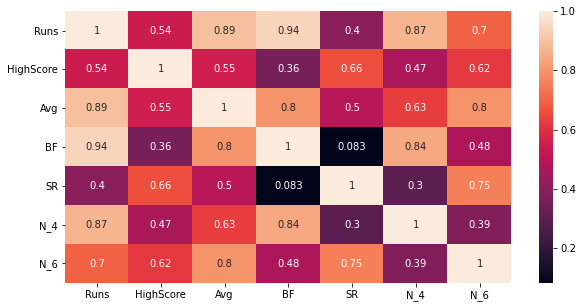

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(tp.corr(),annot=True)


#### Heat map shows the correlation betwen data 

In the above plot the relationship varies from 0-1  and is represented in colored boxes .
1-perfect corelation
* Runs scored by the players are highly corelated to average, Balls faced and N_4
* Avg score is corelated to N_6,BF and Runs 
* BF is corelated to runs Avg and N_4
* SR is corelated to N_6
* N_4 is corelated to runs and BF
* N_4 is corelated to Avg

## Pair Plot

<Figure size 216x216 with 0 Axes>

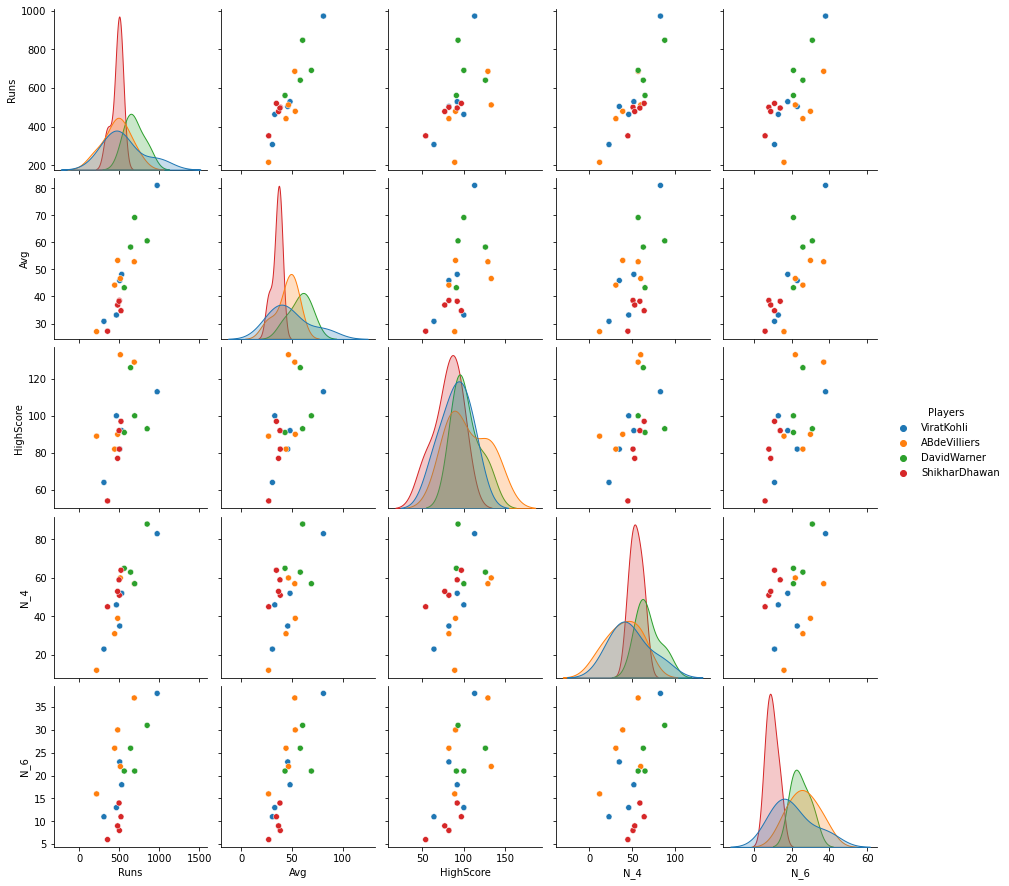

In [51]:
plt.figure(figsize=(3,3))
sns.pairplot(top_Player,vars=["Runs","Avg","HighScore","N_4","N_6"],hue="Players",diag_kind='kde',kind='scatter')

### Observations

##### Pair Plot is plotted to know how the distribution of data and also to find how data is correlated 


Pair plot is the combination of scatter and kde plot of the players performance of IPLt20(2015-2019)
* It shows Runs of players are positively corelated to average,N_4,high score and balls faced 
* Average run rate of players are relted to runs and balls faced 
* Balls faced has corelation on runs, Avg  and N_4 and strike rate 


## Conclusion

* This project aims to analyse the performance of players in IPLT20(2015-2019)

##### Scatter Plot,HeatMap & Pair Plot 
   * From the above analysis we can infer that the total runs scored by the players in each year higly depend on he highest         score,   Average, N_4 and Balls faced by the players 
   
##### Box Plot & Violin Plot 
   * From the above analysis we can find that The virat kohli runs rate is  the highest score among the season (2015-2019) but     his run rate  range is less than the other players 
   * Ab de Vlliers  and Shikar Dhawan Run rate  range is also less than other players 
   * Dawid Warner has th highest score range than the other players which clearly ibdicates that the run rate is depended on        average, Balls faced , N_4 taken which is also high for the player his performance is better than other players in               IPLT20(2015-2019)